In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import time
from datetime import datetime
from IPython.display import clear_output

img_path = 'Diagram.png'
img = mpimg.imread(img_path)

def latest_data(dat_file):
    with open(dat_file, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        latest_entry = last_line.split()
        return latest_entry

def update_image(image_path, CH2, CH3, CH4, timestamp):
    img = mpimg.imread(image_path)
    plt.figure(dpi=200)
    plt.imshow(img)

    plt.text(430, 420, f"T4", fontsize=8, color='red', fontweight='bold',)
    plt.scatter(390,350,color='red',edgecolors='white')
    
    plt.text(450, 780, f"AIN0: {CH2} °C", fontsize=8, color='white', fontweight='bold')
    plt.scatter(500,820,color='white',edgecolors='black')
    
    plt.text(470, 1170, f"AIN2: {CH3} °C", fontsize=8, color='red', fontweight='bold')
    plt.scatter(470,1100,color='red',edgecolors='white')
        
    plt.text(120,1480, f"AIN4: {CH4} °C", fontsize=8, color='lime', fontweight='bold')
    plt.scatter(300,1400,color='lime',edgecolors='white')

    plt.text(1750,730, f"T3", fontsize=8, color='black', fontweight='bold')
    plt.scatter(1750,660,color='black',edgecolors='white')
    
    plt.text(1470,1300, f"T2", fontsize=8, color='magenta', fontweight='bold')
    plt.scatter(1500,1200,color='magenta',edgecolors='white')
    
    plt.text(1140,1470, f"T1", fontsize=8, color='blue', fontweight='bold')
    plt.scatter(1140,1400,color='blue',edgecolors='white')
    
    
    plt.axis('off')
    plt.title(timestamp)  
    plt.show()

def get_latest_file(folder_path):
    files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dat')]
    latest_file = max(files, key=os.path.getmtime)
    return latest_file

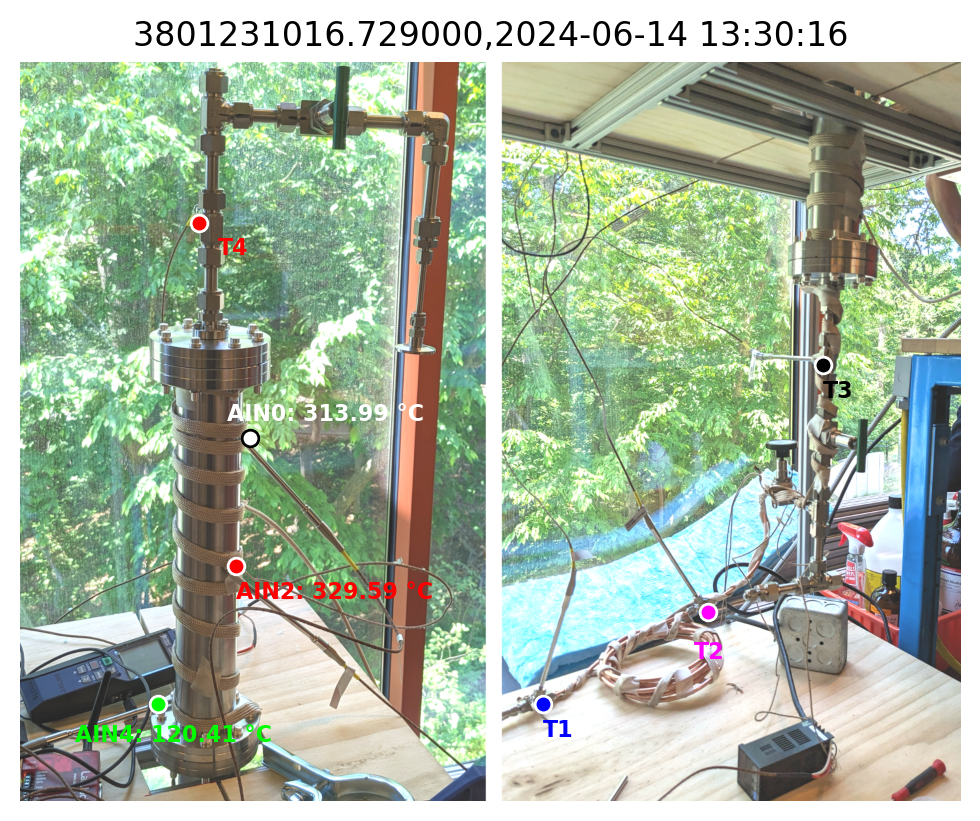

In [ ]:
folder_path = 'C:/Users/rga/Desktop/LJLogfinal/'
csv_file = get_latest_file(folder_path)

latest_entry = latest_data(csv_file)
if latest_entry:
    timestamp = str(latest_entry[0]) + ',' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    CH2 = round(float(latest_entry[1]), 2)
    CH3 = round(float(latest_entry[3]), 2)
    CH4 = round(float(latest_entry[5]), 2)
    
    update_image(img_path, CH2, CH3, CH4, timestamp)
    
if __name__ == "__main__":
    try:
        while True:
            time.sleep(1)
            csv_file = get_latest_file(folder_path)
            new_entry = latest_data(csv_file)
            if new_entry != latest_entry:
                latest_entry = new_entry
                timestamp = str(latest_entry[0]) + ',' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                CH2 = round(float(latest_entry[1]), 2)
                CH3 = round(float(latest_entry[3]), 2)
                CH4 = round(float(latest_entry[5]), 2)
        
                clear_output(wait=True)
                update_image(img_path, CH2, CH3, CH4, timestamp)
                
    except KeyboardInterrupt:
        print("stop")